In [57]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/RAMESH KANNA/Downloads/dataset.csv")

# Display the first few rows of the dataset to understand its structure
data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [58]:
# Check for missing data in each column
missing_data = data.isnull().sum()
print(missing_data)

# Display rows with missing data 
data[data.isnull().any(axis=1)]


species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,NaN
167,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
192,Gentoo,Biscoe,NaN,13.7,208.0,3950.0,female


In [59]:
# Drop rows with missing values
cleaned_data = data.dropna()

# Display the cleaned data
cleaned_data.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [60]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Impute missing values with the mean for numerical columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Impute missing values with the most frequent value (mode) for categorical columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Display the cleaned data
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.500000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.300000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.876855,17.15117,200.915205,4273.976608,male
4,Adelie,Torgersen,36.700000,19.30000,193.000000,3450.000000,female


In [61]:
# Check for outliers using summary statistics
data.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.422408,1.969027,14.020657,1115.961772
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,43.876855,17.300000,197.000000,4050.000000
75%,48.400000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,15000.000000


In [62]:
# Filter the dataset to include only Gentoo penguins
gentoo_penguins = data[data['species'] == 'Gentoo']

# Calculate the average body mass for Gentoo penguins
average_body_mass_gentoo = gentoo_penguins['body_mass_g'].mean()

# Display the result
print(f"The average body mass for Gentoo penguins is {average_body_mass_gentoo} grams.")


The average body mass for Gentoo penguins is 5126.806262969251 grams.


Skewness:
           bill_length_mm  bill_depth_mm
Adelie           0.162533       0.329209
Chinstrap       -0.095936       0.006726
Gentoo           0.712323       0.334623

Kurtosis:
           bill_length_mm  bill_depth_mm
Adelie          -0.228104      -0.101072
Chinstrap       -0.124011      -0.898740
Gentoo           1.147647      -0.611126


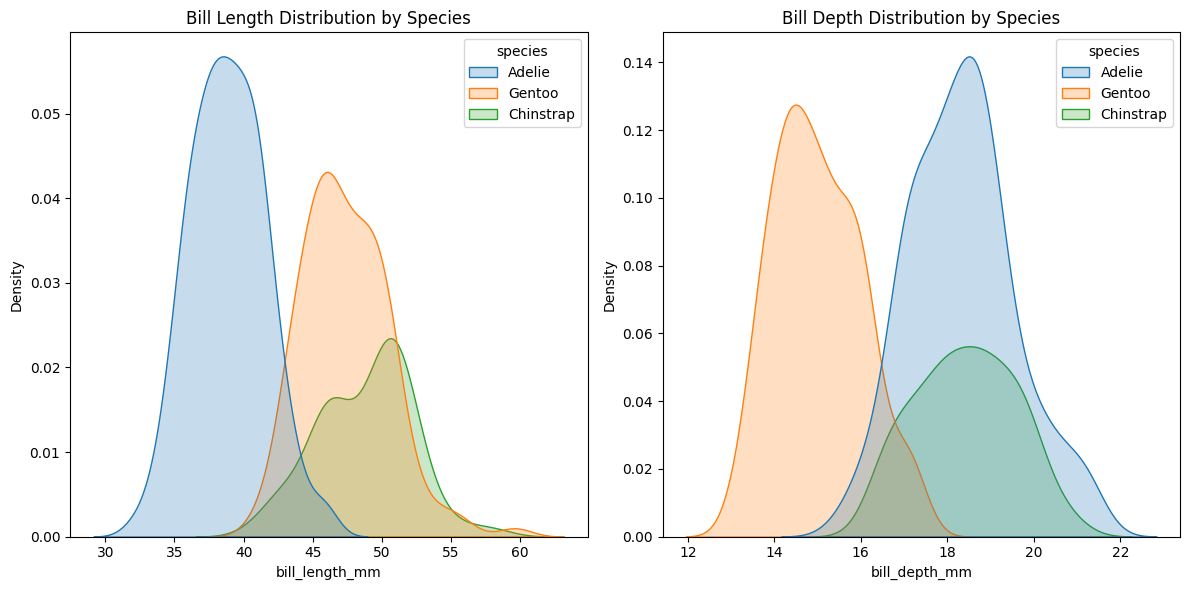

In [63]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load the dataset (assuming it's already loaded as 'data')
# Group by species
species_groups = data.groupby('species')

# Initialize dictionaries to store skewness and kurtosis
skewness = {'bill_length_mm': {}, 'bill_depth_mm': {}}
kurt = {'bill_length_mm': {}, 'bill_depth_mm': {}}

# Iterate through each species and calculate skewness and kurtosis for both bill_length_mm and bill_depth_mm
for species, group in species_groups:
    skewness['bill_length_mm'][species] = skew(group['bill_length_mm'].dropna())
    skewness['bill_depth_mm'][species] = skew(group['bill_depth_mm'].dropna())
    kurt['bill_length_mm'][species] = kurtosis(group['bill_length_mm'].dropna())
    kurt['bill_depth_mm'][species] = kurtosis(group['bill_depth_mm'].dropna())

# Display skewness and kurtosis results
print("Skewness:")
print(pd.DataFrame(skewness))

print("\nKurtosis:")
print(pd.DataFrame(kurt))

# Visualization: KDE plots to compare distributions
plt.figure(figsize=(12, 6))

# Bill Length Distribution
plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x="bill_length_mm", hue="species", fill=True)
plt.title('Bill Length Distribution by Species')

# Bill Depth Distribution
plt.subplot(1, 2, 2)
sns.kdeplot(data=data, x="bill_depth_mm", hue="species", fill=True)
plt.title('Bill Depth Distribution by Species')

plt.tight_layout()
plt.show()


Feature 'bill_length_mm':
 - Lower bound: 25.5875, Upper bound: 62.0875
 - Number of outliers: 0

Feature 'bill_depth_mm':
 - Lower bound: 10.95, Upper bound: 23.349999999999998
 - Number of outliers: 0

Feature 'flipper_length_mm':
 - Lower bound: 155.5, Upper bound: 247.5
 - Number of outliers: 0

Feature 'body_mass_g':
 - Lower bound: 1703.125, Upper bound: 6628.125
 - Number of outliers: 3



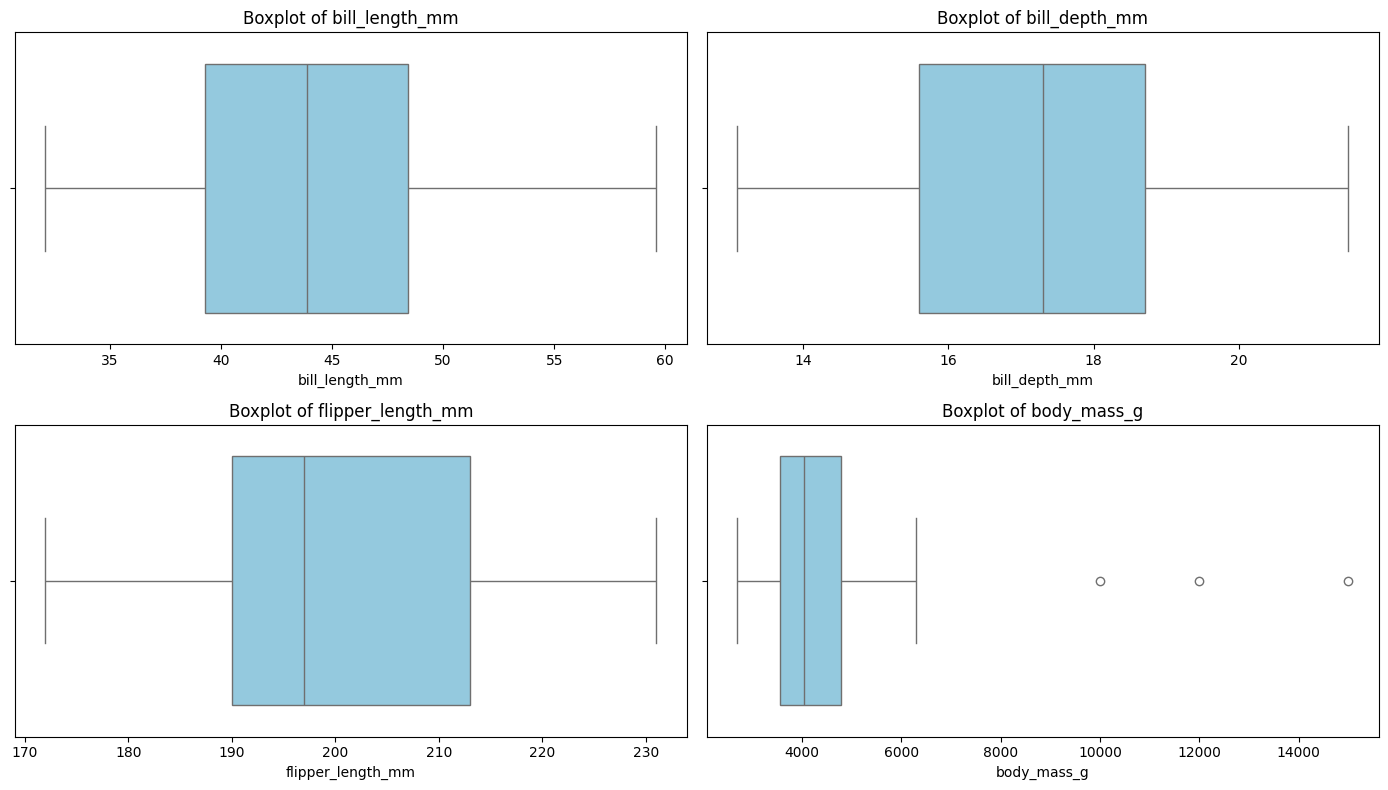

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Dictionary to store outliers for each feature
outliers = {}

# Calculate IQR and detect outliers
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    print(f"Feature '{col}':")
    print(f" - Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f" - Number of outliers: {outliers[col].shape[0]}\n")

# Visualization of Outliers using Boxplots
plt.figure(figsize=(14, 8))

# Boxplot for each numerical feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Explained Variance Ratio per Principal Component:
PC1: 0.62
PC2: 0.20
PC3: 0.13
PC4: 0.05

Cumulative Explained Variance: 1.00


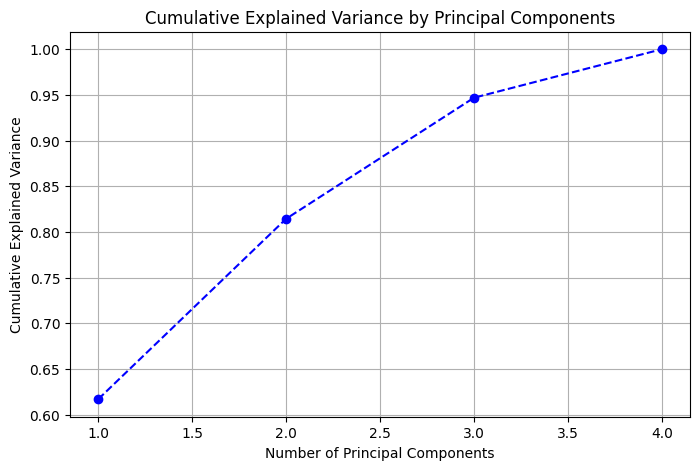

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical columns for PCA
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Drop rows with missing values in the selected columns
data_pca = data[numerical_columns].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_pca)

# Apply PCA
pca = PCA(n_components=len(numerical_columns))  # We choose as many components as features for full analysis
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(len(numerical_columns))])

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Display the results
print("Explained Variance Ratio per Principal Component:")
for i, var in enumerate(explained_variance):
    print(f'PC{i+1}: {var:.2f}')

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print(f"\nCumulative Explained Variance: {cumulative_variance[-1]:.2f}")

# Plot the explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(numerical_columns) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


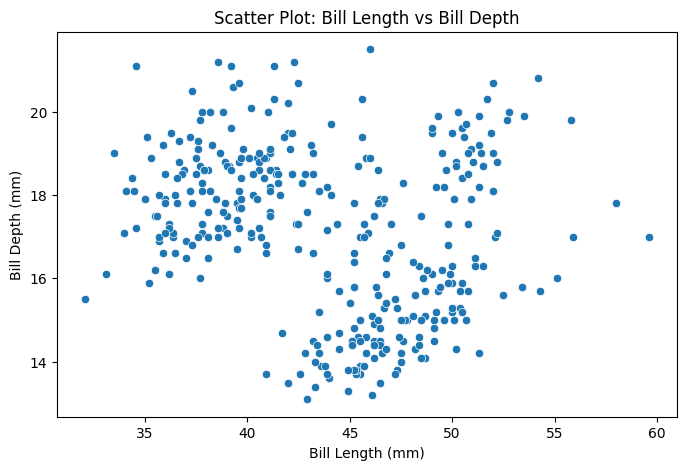

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=data)
plt.title('Scatter Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


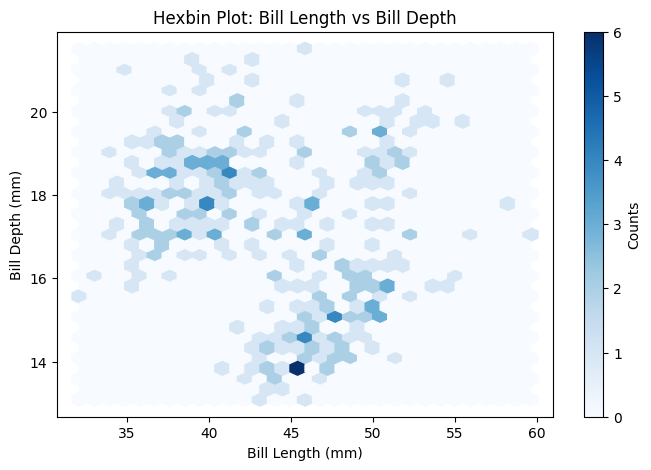

In [67]:
# Hexbin plot
plt.figure(figsize=(8, 5))
plt.hexbin(data['bill_length_mm'], data['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('Hexbin Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()



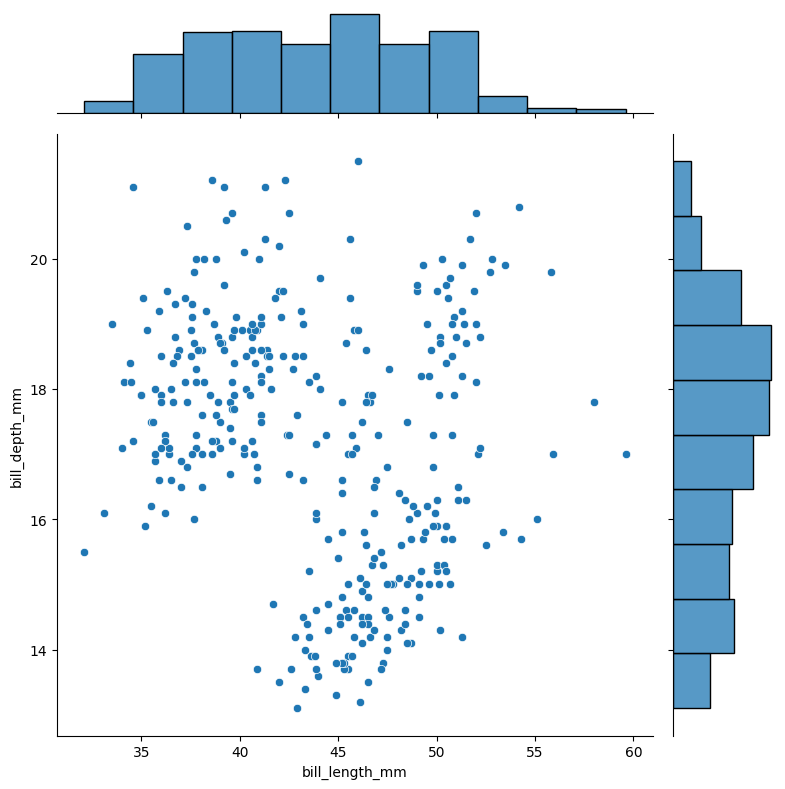

In [68]:
# Joint plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=data, kind='scatter', height=8)
plt.show()


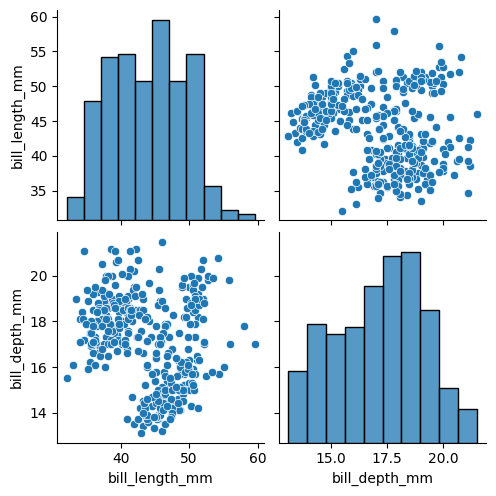

In [69]:
# Pair plot (focusing on bill_length and bill_depth)
sns.pairplot(data[['bill_length_mm', 'bill_depth_mm']])
plt.show()


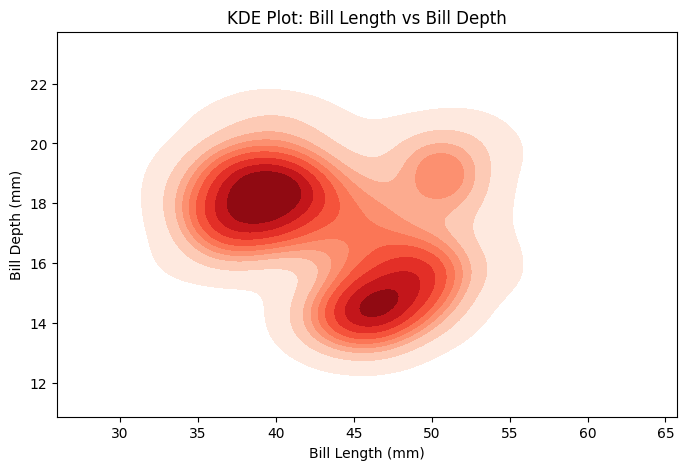

In [70]:
# KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', data=data, cmap="Reds", fill=True)
plt.title('KDE Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


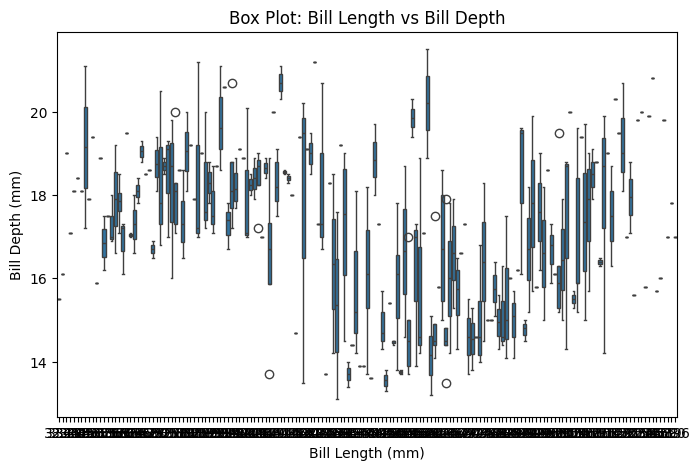

In [71]:
# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='bill_length_mm', y='bill_depth_mm', data=data)
plt.title('Box Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


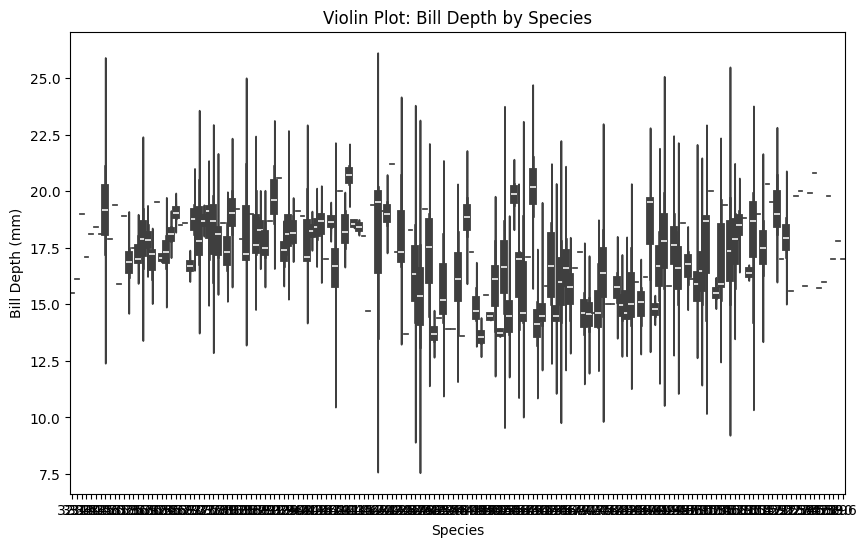

In [72]:
# Violin plot comparing bill_depth_mm across different species
plt.figure(figsize=(10, 6))
sns.violinplot(x='bill_length_mm', y='bill_depth_mm', data=data)
plt.title('Violin Plot: Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()


In [73]:
import pandas as pd

# Group by 'species' and 'island', then find the maximum 'flipper_length_mm'
max_flipper_length = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Identify the species with the longest flippers on each island
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

# Display the result
print(longest_flippers)


     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numerical columns for normalization
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Drop rows with missing values in the selected columns
data_normalized = data[numerical_columns].dropna()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_normalized)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns)

# Display the first few rows of the normalized DataFrame
print(normalized_df.head())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.882230       0.787743          -1.422488    -0.470213
1       -0.808355       0.126556          -1.065352    -0.425343
2       -0.660604       0.431719          -0.422507    -0.918910
3        0.000000       0.000000           0.000000     0.000000
4       -1.325483       1.092905          -0.565361    -0.739431
